<a href="https://colab.research.google.com/github/MaazMaqsood20/GenAI_Embeddings/blob/main/Tweets_Embeddings_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
from sentence_transformers.quantization import quantize_embeddings
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("Dataset_problem_1.csv")

print(data.head())
print(data.info())
print(data.isnull().sum())

   Unnamed: 0                                               text  sentiment
0           0                                               text          0
1           1  rising cases of covid does not alarm me rising...          1
2           2  please vote for chicagoindiaresolution marking...          0
3           3  wishing all of you eidaladha hazrat ibrahim as...          1
4           4  daily coronavirus cases in india top for first...          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134348 entries, 0 to 134347
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  134348 non-null  int64 
 1   text        134330 non-null  object
 2   sentiment   134348 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB
None
Unnamed: 0     0
text          18
sentiment      0
dtype: int64


In [ ]:
data= data.dropna()

In [ ]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 134330 entries, 0 to 134347
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  134330 non-null  int64 
 1   text        134330 non-null  object
 2   sentiment   134330 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ MB
None
(134330, 3)


In [ ]:
import re

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from hashtags
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove special characters, numbers, punctuations
    tweet = re.sub(r'\d+','', tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)
    tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)
    # Convert to lowercase
    tweet = tweet.lower()
    return tweet

data['clean_text'] = data['text'].apply(preprocess_tweet)
print(data['clean_text'].head())

0                                                 text
1    rising cases of covid does not alarm me rising...
2    please vote for chicagoindiaresolution marking...
3    wishing all of you eidaladha hazrat ibrahim as...
4    daily coronavirus cases in india top for first...
Name: clean_text, dtype: object


In [ ]:
# Extract the text data
tweets = data["clean_text"].tolist()
labels = data["sentiment"].tolist()

In [ ]:
# 1. Specify preffered dimensions
dimensions = 512

# 2. load model
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1", truncate_dim=dimensions)

# 2. Encode
embeddings = model.encode(tweets)

# Optional: Quantize the embeddings
binary_embeddings = quantize_embeddings(embeddings, precision="ubinary")

similarities = cos_sim(embeddings[0], embeddings[1:])
print('similarities:', similarities)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/113k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

similarities: tensor([[0.4062, 0.4376, 0.4300,  ..., 0.4130, 0.3620, 0.3715]])


In [ ]:
tweets_df= pd.DataFrame( embeddings)

In [ ]:
tweets_label_df = pd.DataFrame(labels, columns=["sentiment"])

In [ ]:
print(tweets_label_df.shape)
print(tweets_df.shape)

(134330, 1)
(134330, 512)


In [ ]:
tweets_with_sentiments = pd.concat([tweets_df, tweets_label_df], axis=1)

In [ ]:
tweets_with_sentiments

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,sentiment
0,-0.116177,-0.578012,0.266820,0.612927,0.043412,-0.328882,0.070416,0.246055,0.953853,0.156534,...,0.624413,0.134859,-0.150926,-0.405047,-0.236336,0.117629,0.546044,0.229676,-0.145525,0
1,-0.438954,0.130028,-0.379821,-0.151033,-0.067663,-1.131478,0.457838,0.388525,0.212845,1.116551,...,-0.892991,-0.185816,-0.395896,-1.214439,0.361357,-0.603771,-0.201465,-0.107619,0.221383,1
2,-0.033647,-0.108035,-0.629190,-0.286075,-1.212926,-0.066358,0.221781,0.110041,0.152688,-0.247898,...,0.377679,-0.734767,0.292289,-0.779473,-0.408966,-0.695658,0.418231,1.239709,-0.860828,0
3,-0.044687,-0.018981,-0.232337,-0.060745,-0.691857,-0.488906,0.513378,0.910305,-0.048460,-0.488329,...,-0.046599,-0.239052,0.038681,-0.580674,0.137914,-0.748240,-0.635796,0.051760,-0.177839,1
4,-0.211173,-0.150212,-0.126380,0.003937,-0.817010,-0.478490,-0.128679,0.367624,0.503801,0.639812,...,0.263686,-0.249978,-0.253514,-0.793667,0.619124,-0.325835,-0.248071,-0.790655,-0.098776,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134325,0.234209,-0.183857,-0.152755,0.466350,-0.560893,-0.617214,-0.090825,0.554550,-0.289296,-0.005181,...,0.534062,-0.481806,0.329777,-0.751203,0.397953,-0.397630,0.092475,-0.065304,0.056426,1
134326,-0.050828,0.261148,-0.059762,0.037071,0.061836,-0.319267,-0.432461,0.210739,-0.741697,-0.080110,...,-0.316593,-0.636355,0.574136,0.103528,-0.332995,-0.758988,0.480129,0.568983,-0.110260,1
134327,-1.243801,-0.358373,-0.593593,0.120766,0.139527,-0.808578,0.767335,1.374855,0.305391,0.186287,...,0.649682,-0.317468,0.538088,-1.033676,-0.026004,-0.873417,-0.674368,0.081465,0.093073,0
134328,0.371578,0.114485,-0.485860,-0.288717,0.127912,-0.305145,-0.327339,-0.152629,-0.206596,-0.655055,...,0.357176,-0.575636,-0.395040,0.012720,-1.054825,-0.598108,0.066954,0.222141,0.005407,0


In [ ]:
# Assuming tweets_label_df is your DataFrame
#tweets_with_sentiments.to_csv("tweets_labels.csv", index=False)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
X = tweets_with_sentiments.iloc[:, :-1]
y = tweets_with_sentiments.iloc[:, -1]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
xg_cl= xgb.XGBClassifier(base_score=0.5,
                         objective='binary:logistic',
                         n_estimators=1000,
                         booster='gbtree',
                         max_depth=3,
                         colsample_bytree=0.9,
                         subsample= 0.8,
                         seed=42,
                         early_stopping_rounds=50,
                         learning_rate=0.001,
                         )

In [ ]:
xg_cl.fit(X_train,y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100)

[0]	validation_0-logloss:0.69301	validation_1-logloss:0.69301
[100]	validation_0-logloss:0.68048	validation_1-logloss:0.68070
[200]	validation_0-logloss:0.66965	validation_1-logloss:0.67010
[300]	validation_0-logloss:0.66015	validation_1-logloss:0.66082
[400]	validation_0-logloss:0.65182	validation_1-logloss:0.65270
[500]	validation_0-logloss:0.64440	validation_1-logloss:0.64542
[600]	validation_0-logloss:0.63779	validation_1-logloss:0.63895
[700]	validation_0-logloss:0.63182	validation_1-logloss:0.63310
[800]	validation_0-logloss:0.62638	validation_1-logloss:0.62776
[900]	validation_0-logloss:0.62140	validation_1-logloss:0.62287
[999]	validation_0-logloss:0.61680	validation_1-logloss:0.61837


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

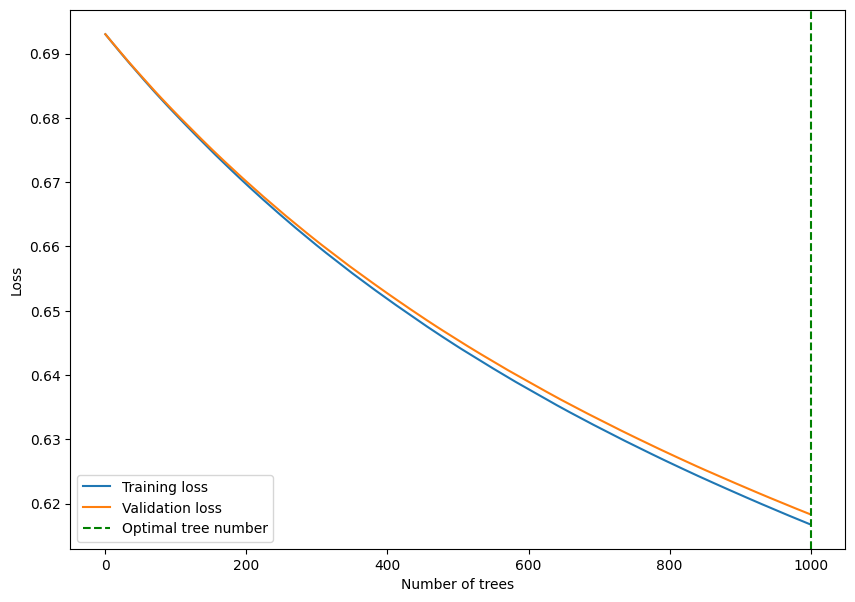

In [ ]:
results = xg_cl.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss")
plt.plot(results["validation_1"]["logloss"], label="Validation loss")
plt.axvline(1000,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [ ]:
y_pred= xg_cl.predict(X_test)

In [ ]:
y_predict_proba = xg_cl.predict_proba(X_test)
print(y_predict_proba)

[[0.5525458  0.44745418]
 [0.42503023 0.57496977]
 [0.30929703 0.690703  ]
 ...
 [0.45763624 0.54236376]
 [0.49332952 0.5066705 ]
 [0.34708494 0.65291506]]


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[9385 3733]
 [4740 9008]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


In [ ]:
precision=precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.71


In [ ]:
recall=recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.66


Feature importances

30


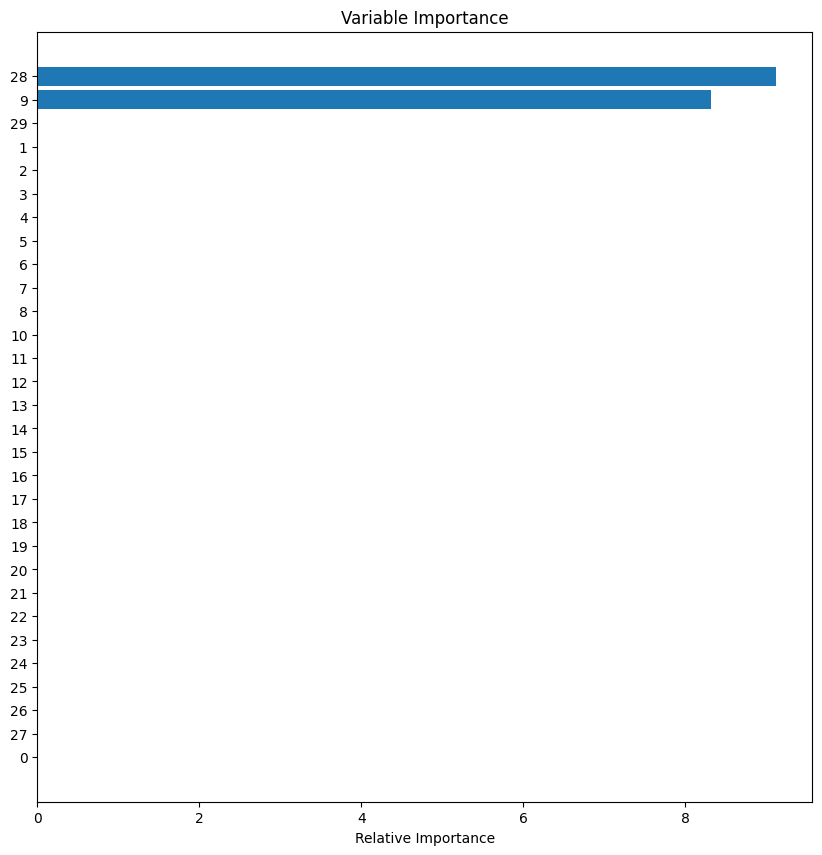

In [ ]:
feature_importance = xg_cl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()